# Regression Models - Cross Validation Analysis

This notebook aims to provide some Out-Of-Fold (OOF) analysis of the models fit. Its importance is to asses the OOF performance and to keep track of configurations used and results gotten. We can export a PDF of this notebook to each experiment we ran and threfore keep the historic of analysis while experimenting to get the best model.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os
import json
main_color = (97/255, 47/255, 116/255, 1.)

### Provide the path to the experiment:

In [82]:
experiment_path = '../experiments/customer_spending/lgbm/cv_results'
#experiment_path = '../experiments/customer_spending/lgbm/final_validation/'
#experiment_path = '../experiments/customer_spending/sklearn_regression/cv_results'

In [83]:
results = pd.read_csv(os.path.join(experiment_path,'results.csv'))
oof_predictions = pd.read_csv(os.path.join(experiment_path,'oof_predictions.csv'))
feature_importances = pd.read_csv(os.path.join(experiment_path,'feature_importances.csv'))
conf = json.load(open(os.path.join(experiment_path,'experiment_conf.txt'),'r'))
X_train = pd.read_csv(os.path.join(experiment_path,'X_train.csv'))

### Experiment Config

In [84]:
display(conf)

{'actions': ['cross_validation'],
 'prediction_path': './new_data',
 'prediction_post_processing': 'InverseCustomerSpendingTransformer',
 'feat_engineering': [['zscore', 'ZScoreFeatureEngineering'],
  ['feat_eng', 'GeneralFeatureEngineering']],
 'pipeline_parameters': {'feat_union__cat_features__constrainer__min_occurrences': 1,
  'feat_union__cat_features__missing_strat__strategy': 'constant',
  'feat_union__num_features__missing_strat__strategy': 'constant'},
 'x_features': ['shortned_user_agent',
  'last_borrowed_in_months',
  'n_issues',
  'real_state',
  'marketing_channel',
  'external_data_provider_email_seen_before',
  'external_data_provider_credit_checks_last_year',
  'score_1',
  'score_2',
  'email',
  'low_reported_income',
  'income',
  'reported_income',
  'log_income',
  'log_reported_income',
  'credit_limit',
  'external_data_provider_fraud_score',
  'state_income_mean',
  'real_state_state_income_mean',
  'estimated_district_income_mean',
  'income_square',
  'report

### Cross-Validation Performance

In [85]:
display(results)

,fold,fit_time,score_time,test_explained,test_mse,test_r_square,train_explained,train_mse,train_r_square
0,0,4.449186,1.049441,0.602653,0.050521,0.602582,0.693738,0.050246,0.693738
1,1,4.545125,1.187433,0.624627,0.074404,0.624515,0.746207,0.037130,0.746202
2,2,3.276011,0.988280,0.558530,0.054359,0.558408,0.605021,0.065204,0.604983
3,3,3.992755,1.042618,0.610668,0.072733,0.610666,0.726336,0.040814,0.726334
4,4,3.784920,1.030679,0.664482,0.049701,0.664482,0.663545,0.053431,0.663543
5,std,0.516948,0.075259,0.038281,0.012214,0.038319,0.055608,0.011079,0.055620
6,mean,4.009599,1.059690,0.612192,0.060344,0.612131,0.686969,0.049365,0.686960


### Out-of-Fold Analysis

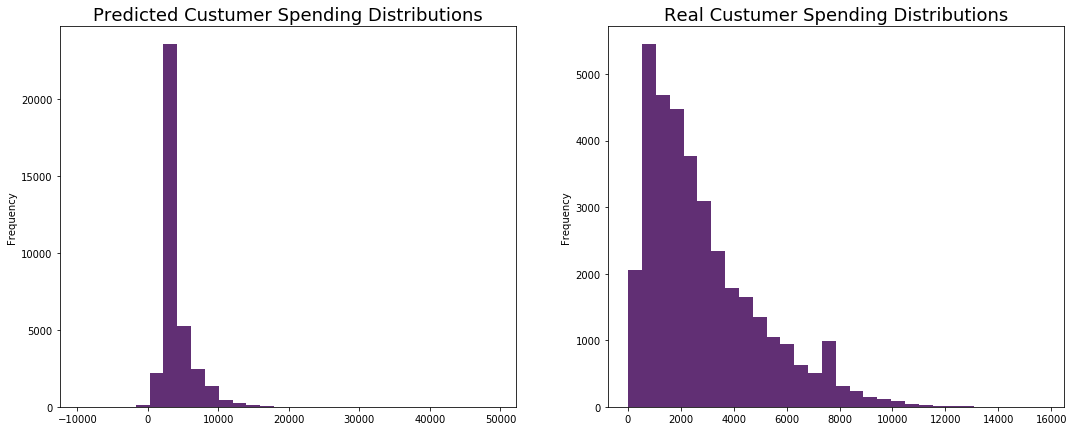

In [86]:
fig = plt.figure(figsize=(18,7))

ax= fig.add_subplot(121)
oof_predictions['y_oof'].plot(kind='hist', bins = 30, ax=ax, color=main_color)
_ = ax.set_title('Predicted Custumer Spending Distributions', fontdict={'fontsize':18})
ax= fig.add_subplot(122)
oof_predictions['y_true'].plot(kind='hist', bins = 30, ax=ax, color=main_color)
_ = ax.set_title('Real Custumer Spending Distributions', fontdict={'fontsize':18})

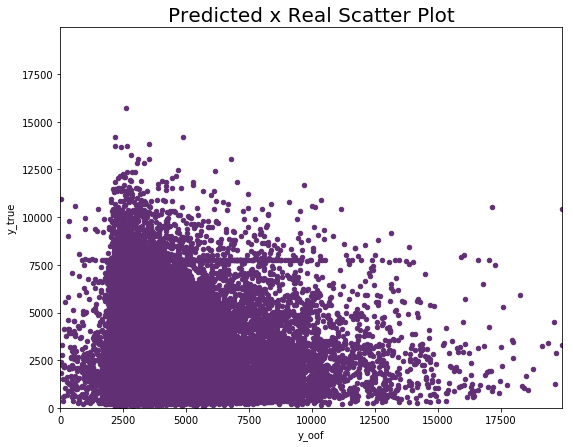

In [87]:
var_name = 'reported_income'
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
oof_predictions = oof_predictions.loc[(oof_predictions['y_oof']>0)&(oof_predictions['y_oof']<20000),:]
oof_predictions.plot(kind='scatter', y='y_true', x='y_oof', ax=ax, color=main_color)
_=ax.set_title('Predicted x Real Scatter Plot', fontsize=20)
plt.axis([0, oof_predictions.max().max(), 0,  oof_predictions.max().max()])
plt.savefig('images/regression_target.png', dpi=300)


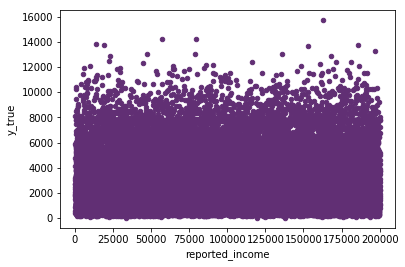

In [88]:
var_name='reported_income'
data_problems = oof_predictions.loc[oof_predictions['y_true']>0.2,:]
data = X_train.loc[data_problems.index,[var_name]].copy()
data['y_true'] = data_problems['y_true']
data.loc[data[var_name]<500000].plot.scatter(y='y_true',x=var_name, color=main_color)

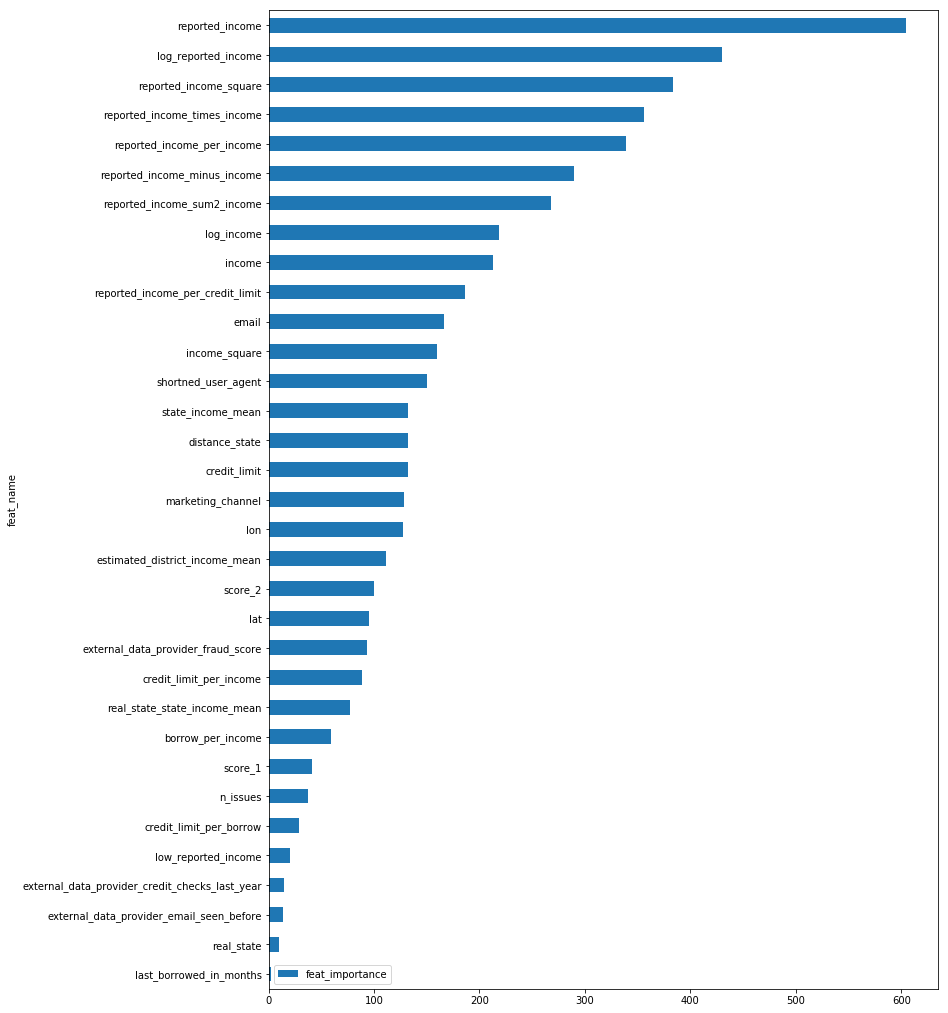

In [89]:
if feature_importances.shape[0]>0:
    fig = plt.figure(figsize=(12,18))
    ax = fig.add_subplot(111)
    _ = feature_importances.set_index('feat_name').sort_values('feat_importance').plot(kind='barh', ax=ax)

In [90]:
oof_predictions

,y_oof,y_true
0,2268.353272,1069.935425
1,3741.373092,1449.815430
2,3360.520604,634.263611
4,14992.216946,1435.928467
5,7529.854974,608.624634
6,3013.057126,6514.526855
7,2062.192840,2654.353760
8,2910.865162,8157.727051
9,3208.468728,905.562744
10,2273.720643,631.914612
